---
# <div align="center">**TEST ALL STRAT WITH XGB**</div>  
---  

<br>

---
# <div align="center">**THIẾT LẬP DỰ ÁN**</div>  
---  

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, TargetEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
pd.set_option('display.max_columns', None)               # Hiển thị đầy đủ bảng với thanh trượt ngang
pd.set_option('display.float_format', '{:,.4f}'.format)  # Làm tròn số hiển thị ở dạng 2 thập phân cho gọn

In [27]:
# Excel gốc bị trống dòng đầu tiên, lấy dòng 2 và 3 làm header
data_raw = pd.read_excel("D:/FOX AI/Project Info/KPI/KPI 2024.xlsx", header=[1,2])

In [28]:
# Tạo cột mới bao gồm các header muốn thay - dạng list (Đối chiếu với file excel cho dễ nhìn)
new_header = ['Tháng', 'CIF CBNV', 'Họ Tên', 
              'Mã ĐVKD', 'Khu vực', 'Đơn vị', 'Chức danh', 'Mã chức danh',     
              'Ngày vào làm việc', 'Giới tính', 'Năm sinh',                   
              'Book Huy động', 'Book Cho vay', 'Net Huy động', 'Net Cho vay',
              'Điểm Book TỔNG HĐ chưa chặn', 'Điểm Book HĐ KỲ HẠN chưa chặn', 'Điểm Book HĐ CASA chưa chặn', 'Điểm Book CV chưa chặn',
              'Điểm Net HĐ', 'Điểm Net CV', 
              'SL KH',
              'KPI_CN Book Value', 'KPI_CN Net Value', 'KPI_CN Điểm DV', 'KPI_CN CLTD/DV',
              'KPI_BP Book Value', 'KPI_BP Net Value', 'KPI_BP Điểm DV', 'KPI_BP CLTD/DV',
              'Tổng điểm CN', 'Tổng điểm BP', 
              'Điểm KH CN', 'Điểm KH BP', 
              'Tỷ trọng KPI_CN', 'Tỷ trọng KPI_BP',
              'Điểm Cộng/Trừ CN', 
              '% KPI_CN', '% KPI_BP', '% KPI cuối cùng', 
              'Thu nhập Gross'
             ]

# Ghi đè cột Header mới đủ 41 biến thay cho Header 1 và 2 MultiIndex, tạo thành dataframe 
data_raw.columns = new_header

# Đổi tên để lưu trữ
df_renamed = data_raw

# Kiểm tra 
display(df_renamed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14074 entries, 0 to 14073
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Tháng                          14074 non-null  float64       
 1   CIF CBNV                       14074 non-null  object        
 2   Họ Tên                         14074 non-null  object        
 3   Mã ĐVKD                        14074 non-null  int64         
 4   Khu vực                        14074 non-null  object        
 5   Đơn vị                         14074 non-null  object        
 6   Chức danh                      14074 non-null  object        
 7   Mã chức danh                   14074 non-null  object        
 8   Ngày vào làm việc              14074 non-null  datetime64[ns]
 9   Giới tính                      14074 non-null  object        
 10  Năm sinh                       14074 non-null  int64         
 11  Book Huy động  

None

In [29]:
# Kiểm tra 2
display(df_renamed.head(3))

,Tháng,CIF CBNV,Họ Tên,Mã ĐVKD,Khu vực,Đơn vị,Chức danh,Mã chức danh,Ngày vào làm việc,Giới tính,Năm sinh,Book Huy động,Book Cho vay,Net Huy động,Net Cho vay,Điểm Book TỔNG HĐ chưa chặn,Điểm Book HĐ KỲ HẠN chưa chặn,Điểm Book HĐ CASA chưa chặn,Điểm Book CV chưa chặn,Điểm Net HĐ,Điểm Net CV,SL KH,KPI_CN Book Value,KPI_CN Net Value,KPI_CN Điểm DV,KPI_CN CLTD/DV,KPI_BP Book Value,KPI_BP Net Value,KPI_BP Điểm DV,KPI_BP CLTD/DV,Tổng điểm CN,Tổng điểm BP,Điểm KH CN,Điểm KH BP,Tỷ trọng KPI_CN,Tỷ trọng KPI_BP,Điểm Cộng/Trừ CN,% KPI_CN,% KPI_BP,% KPI cuối cùng,Thu nhập Gross
0,"2,024.0400",000013897,DANG NGOC XUAN ANH,25,KV6,CN ĐẮK LẮK,Giám đốc Dịch vụ khách hàng,CQL DVKH,2008-06-17,Nữ,1983,"68,382,348,762.0000","853,800,000.0000","3,127,777,986.3333","-385,670,000.0000",56.2000,55.0760,1.1240,1.7500,2.5653,-0.7925,20,29.0400,0.6362,2.9273,-5.0000,294.9600,7.2325,16.7384,-30.0000,27.6035,288.9309,131.3333,413.1667,0.6000,0.4000,NaN,0.2102,0.6993,0.4058,"20,523,350.0000"
1,"2,024.0400",000254297,NGUYEN THI THI DIEM,22,KV3,CN ĐỒNG THÁP,Giám đốc Dịch vụ khách hàng,CQL DVKH,2010-12-15,Nữ,1988,"68,382,348,762.0000","853,800,000.0000","3,127,777,986.3333","-385,670,000.0000",56.2000,55.0760,1.1240,1.7500,2.5653,-0.7925,548,57.9500,1.7728,7.7000,0.0000,182.4400,1.5443,16.1250,0.0000,67.4228,200.1093,131.3333,589.0833,0.6000,0.4000,NaN,0.5134,0.3397,0.4439,"20,523,350.0000"
2,"2,024.0400",000660698,PHAN VAN VAN LOI,27,KV8,CN HÀ NỘI,Giám đốc Dịch vụ khách hàng,CQL DVKH,2008-02-01,Nam,1977,"48,507,770,815.0000","3,221,763.9000","39,407,406,889.8000","220,561.3500",39.8700,39.0726,0.7974,0.0100,31.7709,0.0005,55,39.8800,31.7713,2.3000,0.0000,"1,503.1300",147.4506,152.3307,0.0000,73.9513,"1,802.9114",131.3333,690.8333,0.6000,0.4000,NaN,0.5631,1.5000,0.9378,"26,886,939.0000"


---
# <div align="center">**TIỀN XỬ LÍ DỮ LIỆU**</div>   
---

In [30]:
"""
0. Tháng                          Thời điểm dòng dữ liệu được ghi nhận vào hệ thống 
1. CIF CBNV                       Mã ID độc lập cho từng người, dùng để truy vấn nếu cần
2. Họ Tên
3. Mã ĐVKD             
4. Khu vực             
5. Đơn vị             
6. Chức danh           
7. Mã chức danh
8. Ngày vào làm việc
9. Giới tính
10. Năm sinh
11. Book Huy Động                 Tổng số tiền huy động được từ khách hàng     (tiền gửi, tiết kiệm, đầu tư)       >> Hiệu suất Thu hút vốn
12. Book Cho Vay                  Tổng số tiền đã giải ngân cho khách hàng vay                                     >> Hiệu suất Cho vay
13. Net Huy Động Vốn              = Book Huy Động Vốn - Số tiền khách rút ra   (Mức tăng trưởng của HĐV)           >> Hiệu suất thu hút tiền gừi
14. Net Cho Vay                   = Book Cho Vay - Số tiền khách trả nợ        (Mức tăng trưởng của Dư nợ cho vay) >> Hiệu suất tín dụng
15. Điểm Book Tổng HĐ chưa chặn   = f0(Book HĐ kỳ hạn, HĐ CASA, HĐ khác...)    (Cách tính tùy theo ngân hàng, hàm đã bị ẩn đi
16. Điểm Book HĐ kỳ hạn chưa chặn = f1(Book HĐ kỳ hạn)                          Cách tính tương tự, chỉ khác hàm: chia mức chuẩn, nhân hệ số,....) 
17. Điểm Book HĐ CASA chưa chặn   = f2(Book HĐ CASA)                                         
18. Điểm Book CV chưa chặn        = f3(Book CV)
19. Điểm Net HĐ                   = f4(Net HĐ)
20. Điểm Net CV                   = f5(Net CV)
21. SL KH
22. KPI_CN Book Value             = g0(Book HĐ, Book CV)                        Vẫn tương tự, hàm đã bị ẩn đi:
23. KPI_CN Net Value              = g1(Net HĐ, Net Value)                                     Thêm chặn, thay trọng số,... 
24. KPI_CN Điểm DV                Điểm Dư Vốn /// Điểm Dịch vụ ???????????                                   
25. KPI_CN CLTD/DV                Cho Lãi Tín Dụng / DV
26. KPI_BP Book Value                                                           Vẫn tương tự, hàm khác nữa bị ẩn đi:
27. KPI_BP Net Value                                                                          Chia cho tổng nào đó của bộ phận, thay trọng số,...    
28. KPI_BP Điểm DV                
29. KPI_BP CLTD/DV                       
30. Tổng điểm CN                  = SUM(22 23 24 25)
31. Tổng điểm BP                  = SUM(26 27 28 29)      
32. Điểm KH CN                    Điểm Kế hoạch Cá nhân
33. Điểm KH BP                    Điểm Kế hoạch Bộ phận
34. Tỷ trọng KPI_CN                    Tỷ trọng cột 34 35 để nhân với cột 37 38 ra cột 39        
35. Tỷ trọng KPI_BP                    Ví dụ: GDV tỷ trọng 1 - 0; Càng cấp cao như GĐ, KSV thì tỷ trọng 0.2 - 0.8 (chính sách ngân hàng tùy tháng)
36. Điểm Cộng/Trừ CN              Cộng vào cột 30 ???
37. % KPI_CN                      = 30 / 32
38. % KPI_BP                      = 31 / 33 
39. % KPI cuối cùng               = 30 * 37 + 35 * 38
40. Thu nhập Gross                Thu nhập trước khi trừ đi các khoản chi phí, thuế, bảo hiểm, v.v khác
"""

'\n0. Tháng                          Thời điểm dòng dữ liệu được ghi nhận vào hệ thống \n1. CIF CBNV                       Mã ID độc lập cho từng người, dùng để truy vấn nếu cần\n2. Họ Tên\n3. Mã ĐVKD             \n4. Khu vực             \n5. Đơn vị             \n6. Chức danh           \n7. Mã chức danh\n8. Ngày vào làm việc\n9. Giới tính\n10. Năm sinh\n11. Book Huy Động                 Tổng số tiền huy động được từ khách hàng     (tiền gửi, tiết kiệm, đầu tư)       >> Hiệu suất Thu hút vốn\n12. Book Cho Vay                  Tổng số tiền đã giải ngân cho khách hàng vay                                     >> Hiệu suất Cho vay\n13. Net Huy Động Vốn              = Book Huy Động Vốn - Số tiền khách rút ra   (Mức tăng trưởng của HĐV)           >> Hiệu suất thu hút tiền gừi\n14. Net Cho Vay                   = Book Cho Vay - Số tiền khách trả nợ        (Mức tăng trưởng của Dư nợ cho vay) >> Hiệu suất tín dụng\n15. Điểm Book Tổng HĐ chưa chặn   = f0(Book HĐ kỳ hạn, HĐ CASA, HĐ khác...)    (Cá

In [31]:
# Tạo bản sao dataframe gọn, tránh ghi đè
df = df_renamed.copy()

# Xóa
df.drop(columns=['CIF CBNV', 'Họ Tên'], inplace=True)

# Xóa biến đỡ phải chuẩn hóa
df.drop(columns=['Tháng', 'Năm sinh', 'Ngày vào làm việc', 'Giới tính'], inplace=True)

# Xóa biến đỡ phải chuẩn hóa 
df.drop(columns=['Mã ĐVKD', 'Khu vực', 'Đơn vị', 'Chức danh', 'Mã chức danh'], inplace=True)

---
## **MA TRẬN TƯƠNG QUAN GỐC**

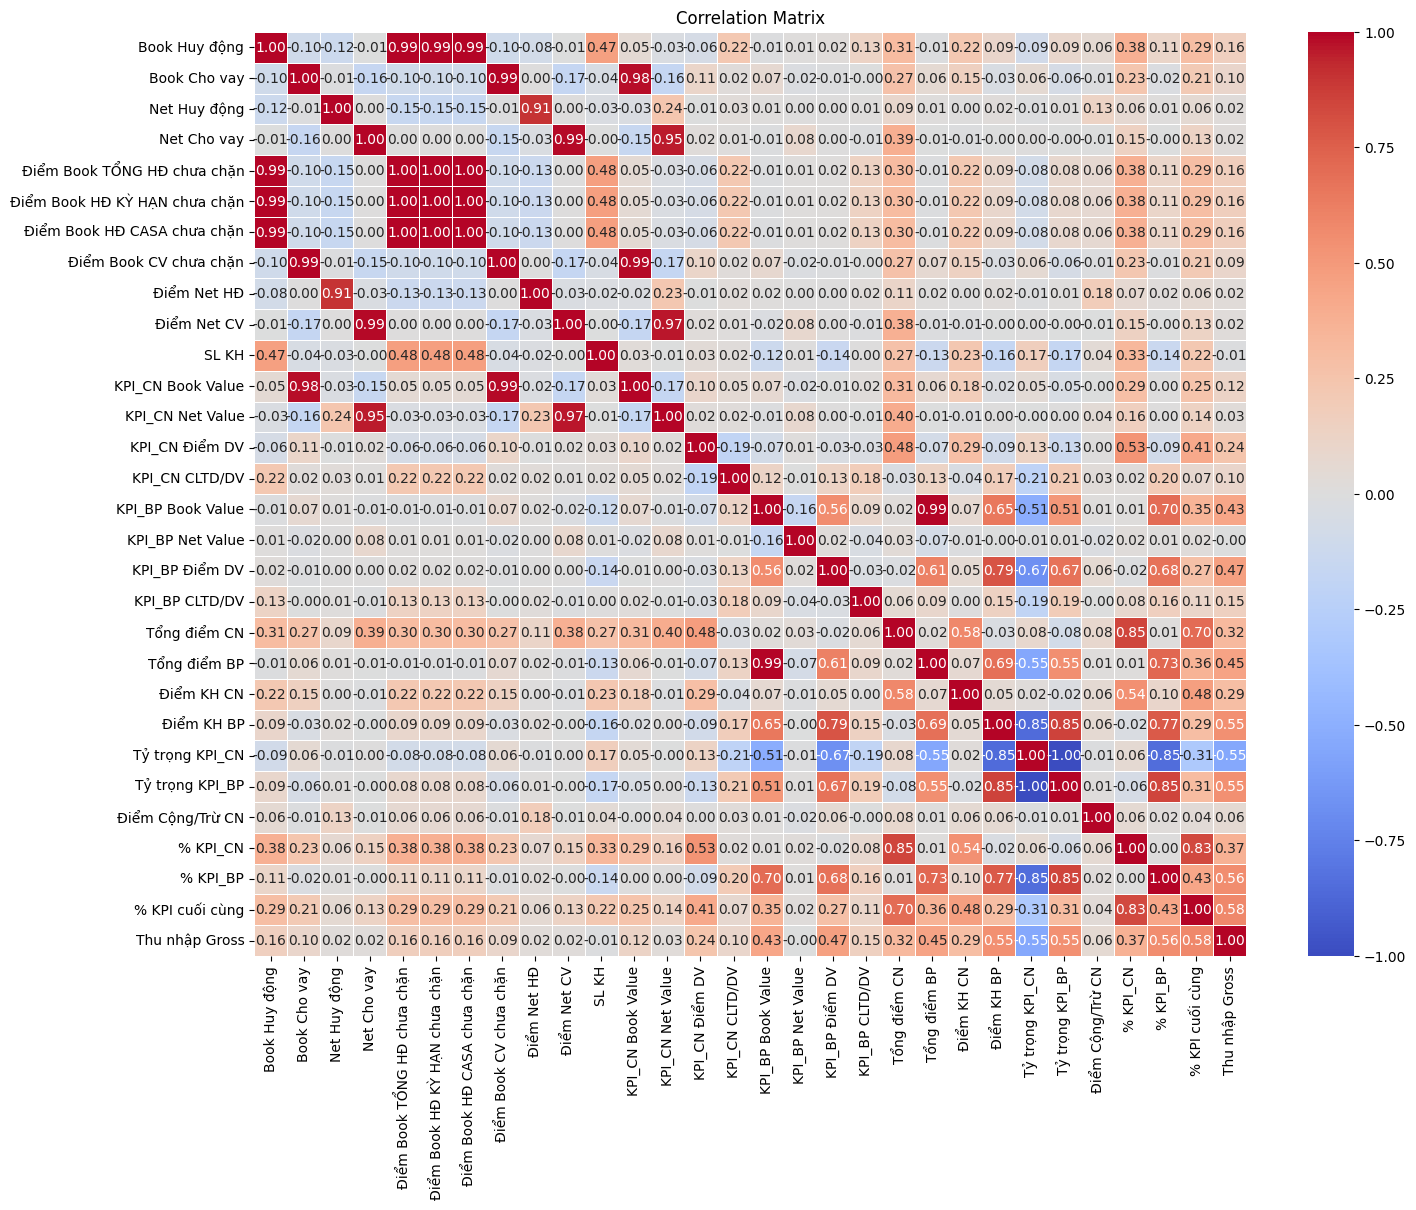

In [32]:
# Ma trận tương quan ban đầu
df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [33]:
# Xóa các biến tương quan quá cao > 0.9
df.drop(columns=['Điểm Book TỔNG HĐ chưa chặn', 'Điểm Book HĐ KỲ HẠN chưa chặn', 'Điểm Book HĐ CASA chưa chặn', 
                 'Điểm Book CV chưa chặn',             
                 'Điểm Net HĐ',                         
                 'Điểm Net CV',                        
                 'KPI_CN Book Value',                   
                 'KPI_CN Net Value',   # Giữ lại 4 cột gốc 'Book Huy động', 'Book cho vay', ' Net Huy động', 'Net Cho vay'
                 'Tỷ trọng KPI_BP'     # Giữ lại 1 cột gốc 'Tỷ trọng KPI_CN'
                ], inplace=True)

# Xóa các biến không tồn tại khi triển khai
df.drop(columns=['Tổng điểm CN', 'Tổng điểm BP', 
                 '% KPI_CN', '% KPI_BP', 
                 'Thu nhập Gross'
                ], inplace=True)

# Xóa biến thiếu ý nghĩa - khoảng 90% giá trị = 0
df.drop(columns=['Điểm Cộng/Trừ CN'], inplace=True)

---
## **KIỂM TRA TOÀN BỘ**
- **MA TRẬN TƯƠNG QUAN**
- **PHÂN PHỐI**
- **THỐNG KÊ MÔ TẢ**

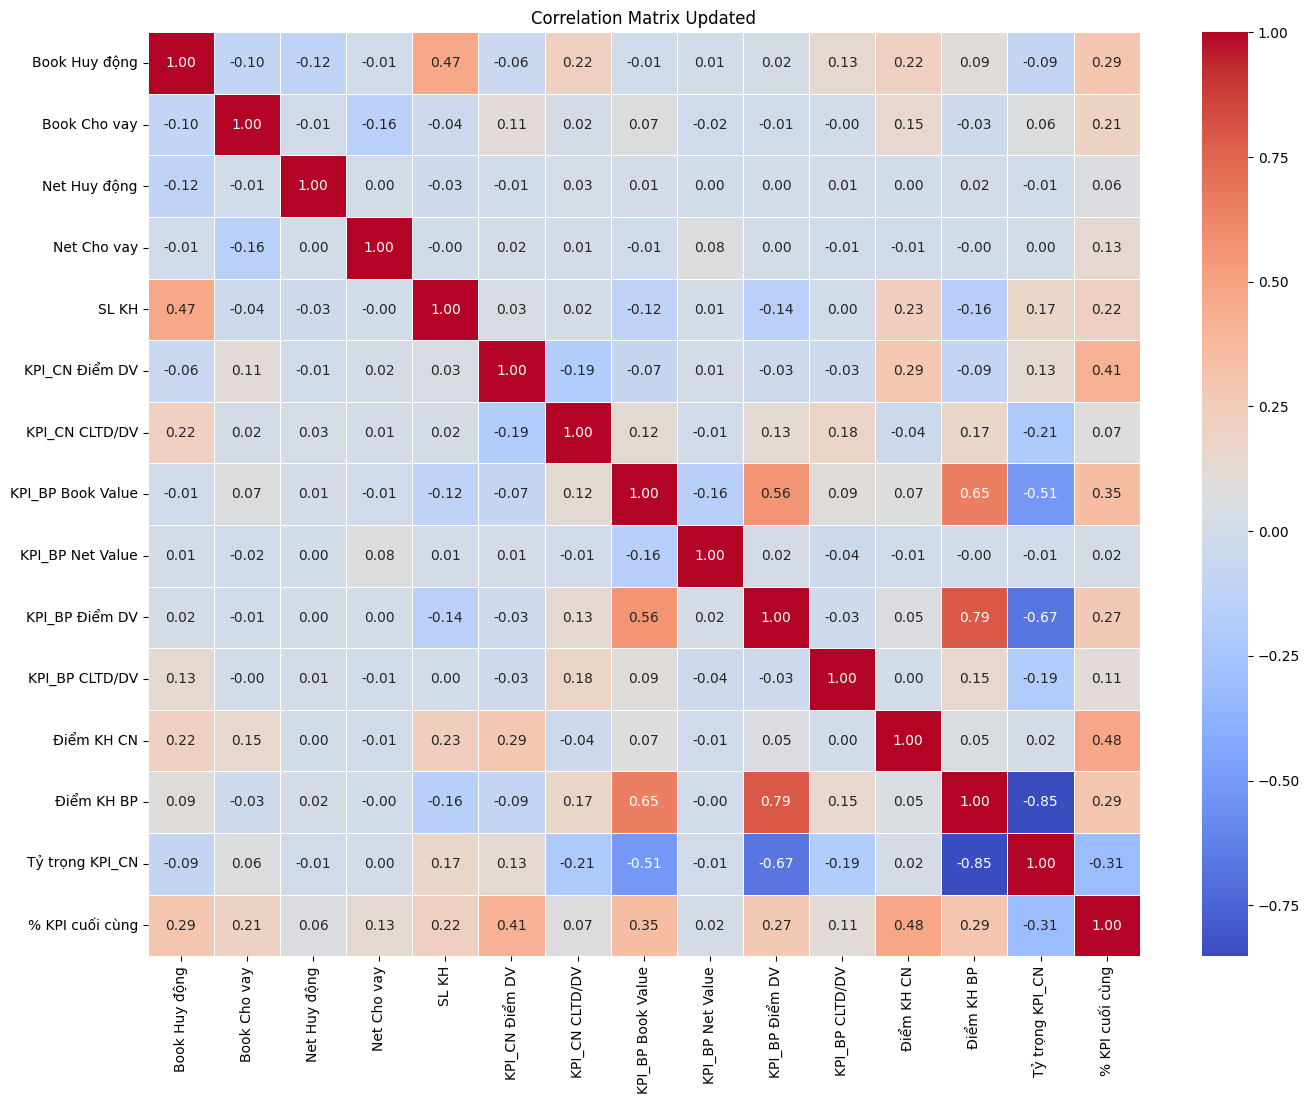

In [34]:
# Ma trận tương quan 2
df_numeric_2 = df.select_dtypes(include=[np.number])
corr_matrix_2 = df_numeric_2.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix_2, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Updated')
plt.show()

In [35]:
cols_to_keep = [
    "Book Huy động",       
    "Book Cho vay",
    "Net Huy động",
    "Net Cho vay",
    "SL KH",
    "KPI_CN Điểm DV",   # Comment để xóa nhanh các cột và thử nghiệm
    "KPI_CN CLTD/DV",
    "KPI_BP Book Value",
    "KPI_BP Net Value",
    "KPI_BP Điểm DV",
    "KPI_BP CLTD/DV",
    "Điểm KH CN",
    "Điểm KH BP",
    "Tỷ trọng KPI_CN",
    "% KPI cuối cùng",  # Target
]

# Tạo dataframe mới từ các cột đã chọn
df1 = df[cols_to_keep].copy()

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np
import pandas as pd

# 1. Tách X, y
X = df1.drop(columns=["% KPI cuối cùng"])
y = df1["% KPI cuối cùng"]

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit mô hình XGB
xgb = XGBRegressor(
    colsample_bytree=0.8,
    learning_rate=0.07,
    max_depth=7,
    n_estimators=250,
    subsample=0.8,
    random_state=42,
    verbosity=0
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Fit mô hình LGBM với quantile
lgbm = LGBMRegressor(
    objective="quantile",
    alpha=0.5,
    learning_rate=0.15,
    n_estimators=250,
    max_depth=7,
    min_child_samples=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbose=-1
)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

# Tạo bảng kết quả
results = pd.DataFrame({
    "Model": ["XGBoost", "LGBM (quantile)"],
    "R² Test": [
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_lgbm),
    ],
    "MAE Test": [
        mean_absolute_error(y_test, y_pred_xgb),
        mean_absolute_error(y_test, y_pred_lgbm),
    ],
    "RMSE Test": [
        root_mean_squared_error(y_test, y_pred_xgb),
        root_mean_squared_error(y_test, y_pred_lgbm),
    ]
})
results

,Model,R² Test,MAE Test,RMSE Test
0,XGBoost,0.9719,0.0342,0.0676
1,LGBM (quantile),0.9605,0.0408,0.0801


---

In [37]:
random_state = 42
alpha = 0.05

---

In [38]:
from mapie.regression import MapieRegressor
from mapie.metrics import regression_coverage_score, regression_mean_width_score

# Fit MAPIE với chiến lược naive, giữ nguyên model lõi đã train
mapie_naive = MapieRegressor(
    estimator=xgb,        
    method="naive",
    test_size=0.3,
    random_state=random_state
)
mapie_naive.fit(X_train, y_train)

y_pred_naive, y_pis_naive = mapie_naive.predict(X_test, alpha=alpha)
y_lower_naive = y_pis_naive[:, 0, 0]
y_upper_naive = y_pis_naive[:, 1, 0]

df_naive = pd.DataFrame({
    "y_lower_naive": y_lower_naive,
    "y_pred_naive": y_pred_naive,
    "y_upper_naive": y_upper_naive,
    "y_true": y_test.reset_index(drop=True)
})
display(df_naive.head(5))

coverage_naive = regression_coverage_score(y_test, y_lower_naive, y_upper_naive)
width_naive = regression_mean_width_score(y_lower_naive, y_upper_naive)
print(f"Coverage (naive): {coverage_naive:.3f}")
print(f"Mean interval width (naive): {width_naive:.3f}")

,y_lower_naive,y_pred_naive,y_upper_naive,y_true
0,0.4515,0.4990,0.5464,0.3732
1,0.3920,0.4394,0.4869,0.3932
2,0.4527,0.5002,0.5476,0.4936
3,1.7436,1.7911,1.8385,1.7903
4,0.8078,0.8553,0.9028,0.8324


Coverage (naive): 0.811
Mean interval width (naive): 0.095


In [39]:
# Fit MAPIE với chiến lược cv_plus
mapie_cv_plus = MapieRegressor(
    estimator=xgb,
    method="plus",
    cv=10,  # KFold,
    random_state=random_state
)
mapie_cv_plus.fit(X_train, y_train)

y_pred_cv_plus, y_pis_cv_plus = mapie_cv_plus.predict(X_test, alpha=alpha)
y_lower_cv_plus = y_pis_cv_plus[:, 0, 0]
y_upper_cv_plus = y_pis_cv_plus[:, 1, 0]

df_cv_plus = pd.DataFrame({
    "y_lower_cv_plus": y_lower_cv_plus,
    "y_pred_cv_plus": y_pred_cv_plus,
    "y_upper_cv_plus": y_upper_cv_plus,
    "y_true": y_test.reset_index(drop=True)
})
display(df_cv_plus.head(5))

coverage_cv_plus = regression_coverage_score(y_test, y_lower_cv_plus, y_upper_cv_plus)
width_cv_plus = regression_mean_width_score(y_lower_cv_plus, y_upper_cv_plus)
print(f"Coverage (cv_plus): {coverage_cv_plus:.3f}")
print(f"Mean interval width (cv_plus): {width_cv_plus:.3f}")

,y_lower_cv_plus,y_pred_cv_plus,y_upper_cv_plus,y_true
0,0.3538,0.4990,0.5920,0.3732
1,0.3021,0.4394,0.5332,0.3932
2,0.3769,0.5002,0.6080,0.4936
3,1.4937,1.7911,1.8420,1.7903
4,0.7388,0.8553,0.9693,0.8324


Coverage (cv_plus): 0.961
Mean interval width (cv_plus): 0.238


In [40]:
from mapie.subsample import Subsample

# Fit MAPIE với chiến lược jackknife_plus_ab
mapie_jackknife = MapieRegressor(
    estimator=xgb,
    method="plus",
    cv=Subsample(n_resamplings=50),  # Đây chính là phần jackknife
    random_state=random_state
)
mapie_jackknife.fit(X_train, y_train)

y_pred_jackknife, y_pis_jackknife = mapie_jackknife.predict(X_test, alpha=alpha)
y_lower_jackknife = y_pis_jackknife[:, 0, 0]
y_upper_jackknife = y_pis_jackknife[:, 1, 0]

df_jackknife = pd.DataFrame({
    "y_lower_jackknife": y_lower_jackknife,
    "y_pred_jackknife": y_pred_jackknife,
    "y_upper_jackknife": y_upper_jackknife,
    "y_true": y_test.reset_index(drop=True)
})
display(df_jackknife.head(5))

coverage_jackknife = regression_coverage_score(y_test, y_lower_jackknife, y_upper_jackknife)
width_jackknife = regression_mean_width_score(y_lower_jackknife, y_upper_jackknife)
print(f"Coverage (jackknife_plus_ab): {coverage_jackknife:.3f}")
print(f"Mean interval width (jackknife_plus_ab): {width_jackknife:.3f}")

,y_lower_jackknife,y_pred_jackknife,y_upper_jackknife,y_true
0,0.4228,0.4990,0.5505,0.3732
1,0.3584,0.4394,0.4862,0.3932
2,0.4241,0.5002,0.5526,0.4936
3,1.5802,1.7911,1.7161,1.7903
4,0.7883,0.8553,0.9159,0.8324


Coverage (jackknife_plus_ab): 0.872
Mean interval width (jackknife_plus_ab): 0.129


In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
from sklearn.metrics import mean_pinball_loss

# Đặt alpha
alpha_lower = alpha / 2
alpha_upper = 1 - alpha / 2

# Các quantile tương ứng
q1 = alpha_lower
q2 = 0.5
q3 = alpha_upper

# Đặt seed
random_state = 42

# Param grid để search
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0]
}

# Scorer cho từng quantile
scorer_q1 = make_scorer(mean_pinball_loss, alpha=q1, greater_is_better=False)
scorer_q2 = make_scorer(mean_pinball_loss, alpha=q2, greater_is_better=False)
scorer_q3 = make_scorer(mean_pinball_loss, alpha=q3, greater_is_better=False)

# Train model q1
model_q1 = XGBRegressor(objective='reg:quantileerror', quantile_alpha=q1, random_state=random_state)
search_q1 = RandomizedSearchCV(model_q1, param_distributions=param_grid, cv=3, n_iter=5, random_state=random_state, scoring=scorer_q1)
search_q1.fit(X_train, y_train)
best_q1 = search_q1.best_estimator_

# Train model q2 (median)
model_q2 = XGBRegressor(objective='reg:quantileerror', quantile_alpha=q2, random_state=random_state)
search_q2 = RandomizedSearchCV(model_q2, param_distributions=param_grid, cv=3, n_iter=5, random_state=random_state, scoring=scorer_q2)
search_q2.fit(X_train, y_train)
best_q2 = search_q2.best_estimator_

# Train model q3
model_q3 = XGBRegressor(objective='reg:quantileerror', quantile_alpha=q3, random_state=random_state)
search_q3 = RandomizedSearchCV(model_q3, param_distributions=param_grid, cv=3, n_iter=5, random_state=random_state, scoring=scorer_q3)
search_q3.fit(X_train, y_train)
best_q3 = search_q3.best_estimator_

# Fit lại từng model với best_params tìm được
xgb_lower = XGBRegressor(objective='reg:quantileerror', quantile_alpha=q1, **search_q1.best_params_, random_state=random_state)
xgb_lower.fit(X_train, y_train)

xgb_median = XGBRegressor(objective='reg:quantileerror', quantile_alpha=q2, **search_q2.best_params_, random_state=random_state)
xgb_median.fit(X_train, y_train)

xgb_upper = XGBRegressor(objective='reg:quantileerror', quantile_alpha=q3, **search_q3.best_params_, random_state=random_state)
xgb_upper.fit(X_train, y_train)

"✅ Đã train xong 3 model quantile (lower, median, upper) theo đúng cách như GitHub đề xuất."


'✅ Đã train xong 3 model quantile (lower, median, upper) theo đúng cách như GitHub đề xuất.'

In [42]:
from mapie.regression import MapieQuantileRegressor
from mapie.metrics import regression_coverage_score, regression_mean_width_score

# Gộp 3 model đã train trước vào dạng list (theo thứ tự: lower - median - upper)
models_prefit = [xgb_lower, xgb_median, xgb_upper]

# Fit MapieQuantileRegressor với cv="prefit"
mapie_cqr_prefit = MapieQuantileRegressor(
    estimator=models_prefit,
    method="quantile",          # Phải dùng "quantile" mới support kiểu 3 mô hình
    alpha=alpha,                # Alpha đang là 0.05
    cv="prefit"                 # Vì ta đã tự train model rồi
)

mapie_cqr_prefit.fit(X_train, y_train, random_state=42)  # Cần thiết cho MAPIE để nó lưu y_train

MapieQuantileRegressor(alpha=0.05, cv='prefit',
                       estimator=[XGBRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=0.9,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None,
                                               feature_weights=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,...
                                               feature_weights=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.1, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=3,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=200, n_jobs=None,
                                               num_parallel_tree=None, ...)])

In [43]:

# ----- Block 3: predict với MAPIE -----
y_pred_cqr_prefit, y_pis_cqr_prefit = mapie_cqr_prefit.predict(X_test)

# (tuỳ chọn) Nếu muốn chắc median chính là model q0.5:
# y_pred_cqr_prefit = xgb_median.predict(X_test)   # ghi đè lại

# Lấy bound
y_lower_cqr_prefit = y_pis_cqr_prefit[:, 0, 0]
y_upper_cqr_prefit = y_pis_cqr_prefit[:, 1, 0]

df_cqr_prefit = pd.DataFrame({
    "y_lower_cqr_prefit": y_lower_cqr_prefit,
    "y_pred_cqr_prefit": y_pred_cqr_prefit,
    "y_upper_cqr_prefit": y_upper_cqr_prefit,
    "y_true": y_test
})

coverage_cqr = regression_coverage_score(y_test, y_lower_cqr_prefit, y_upper_cqr_prefit)
width_cqr    = regression_mean_width_score(y_lower_cqr_prefit, y_upper_cqr_prefit)
print(f"Coverage (CQR prefit): {coverage_cqr:.3f}")
print(f"Mean interval width (CQR prefit): {width_cqr:.3f}")

INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.


Coverage (CQR prefit): 0.925
Mean interval width (CQR prefit): 0.395


In [44]:
def sort_y_values(y_test, y_pred, y_lower, y_upper):
    indices = np.argsort(y_test)
    return (
        y_test[indices],
        y_pred[indices],
        y_lower[indices],
        y_upper[indices],
    )


from matplotlib.offsetbox import AnnotationBbox, TextArea
from matplotlib.ticker import FormatStrFormatter

def plot_prediction_intervals(
    title,
    axs,
    y_test_sorted,
    y_pred_sorted,
    lower_bound,
    upper_bound,
    coverage,
    width,
    num_plots_idx
):
    axs.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axs.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    # Subsample
    y_test_sorted_ = np.take(y_test_sorted, num_plots_idx)
    y_pred_sorted_ = np.take(y_pred_sorted, num_plots_idx)
    lower_bound_ = np.take(lower_bound, num_plots_idx)
    upper_bound_ = np.take(upper_bound, num_plots_idx)

    # Trung tâm = trung bình 2 biên
    center = (lower_bound_ + upper_bound_) / 2
    error = np.abs(upper_bound_ - lower_bound_) / 2  # 1 phía

    # Inside
    inside_interval = (y_test_sorted_ >= lower_bound_) & (y_test_sorted_ <= upper_bound_)
    outside_interval = ~inside_interval

    axs.errorbar(
        y_test_sorted_[inside_interval],
        center[inside_interval],
        yerr=error[inside_interval],
        capsize=5,
        marker="o",
        elinewidth=2,
        linewidth=0,
        color="blue",
        label="Inside prediction interval"
    )

    axs.errorbar(
        y_test_sorted_[outside_interval],
        center[outside_interval],
        yerr=error[outside_interval],
        capsize=5,
        marker="o",
        elinewidth=2,
        linewidth=0,
        color="red",
        label="Outside prediction interval"
    )

    axs.scatter(
        y_test_sorted_[outside_interval],
        y_test_sorted_[outside_interval],
        marker="*",
        color="green",
        label="True value"
    )

    axs.set_xlabel("TRUE")
    axs.set_ylabel("PREDICT")
    axs.set_title(title, fontweight='bold')

    ab = AnnotationBbox(
        TextArea(
            f"Coverage: {np.round(coverage, 3)}\n"
            f"Interval width: {np.round(width, 3)}"
        ),
        xy=(np.min(y_test_sorted_)*1.5, np.max(center + error)*0.95),
    )
    axs.add_artist(ab)

    lims = [
        np.min([axs.get_xlim(), axs.get_ylim()]),
        np.max([axs.get_xlim(), axs.get_ylim()])
    ]
    axs.plot(lims, lims, '--', alpha=0.75, color="black", label="x=y")


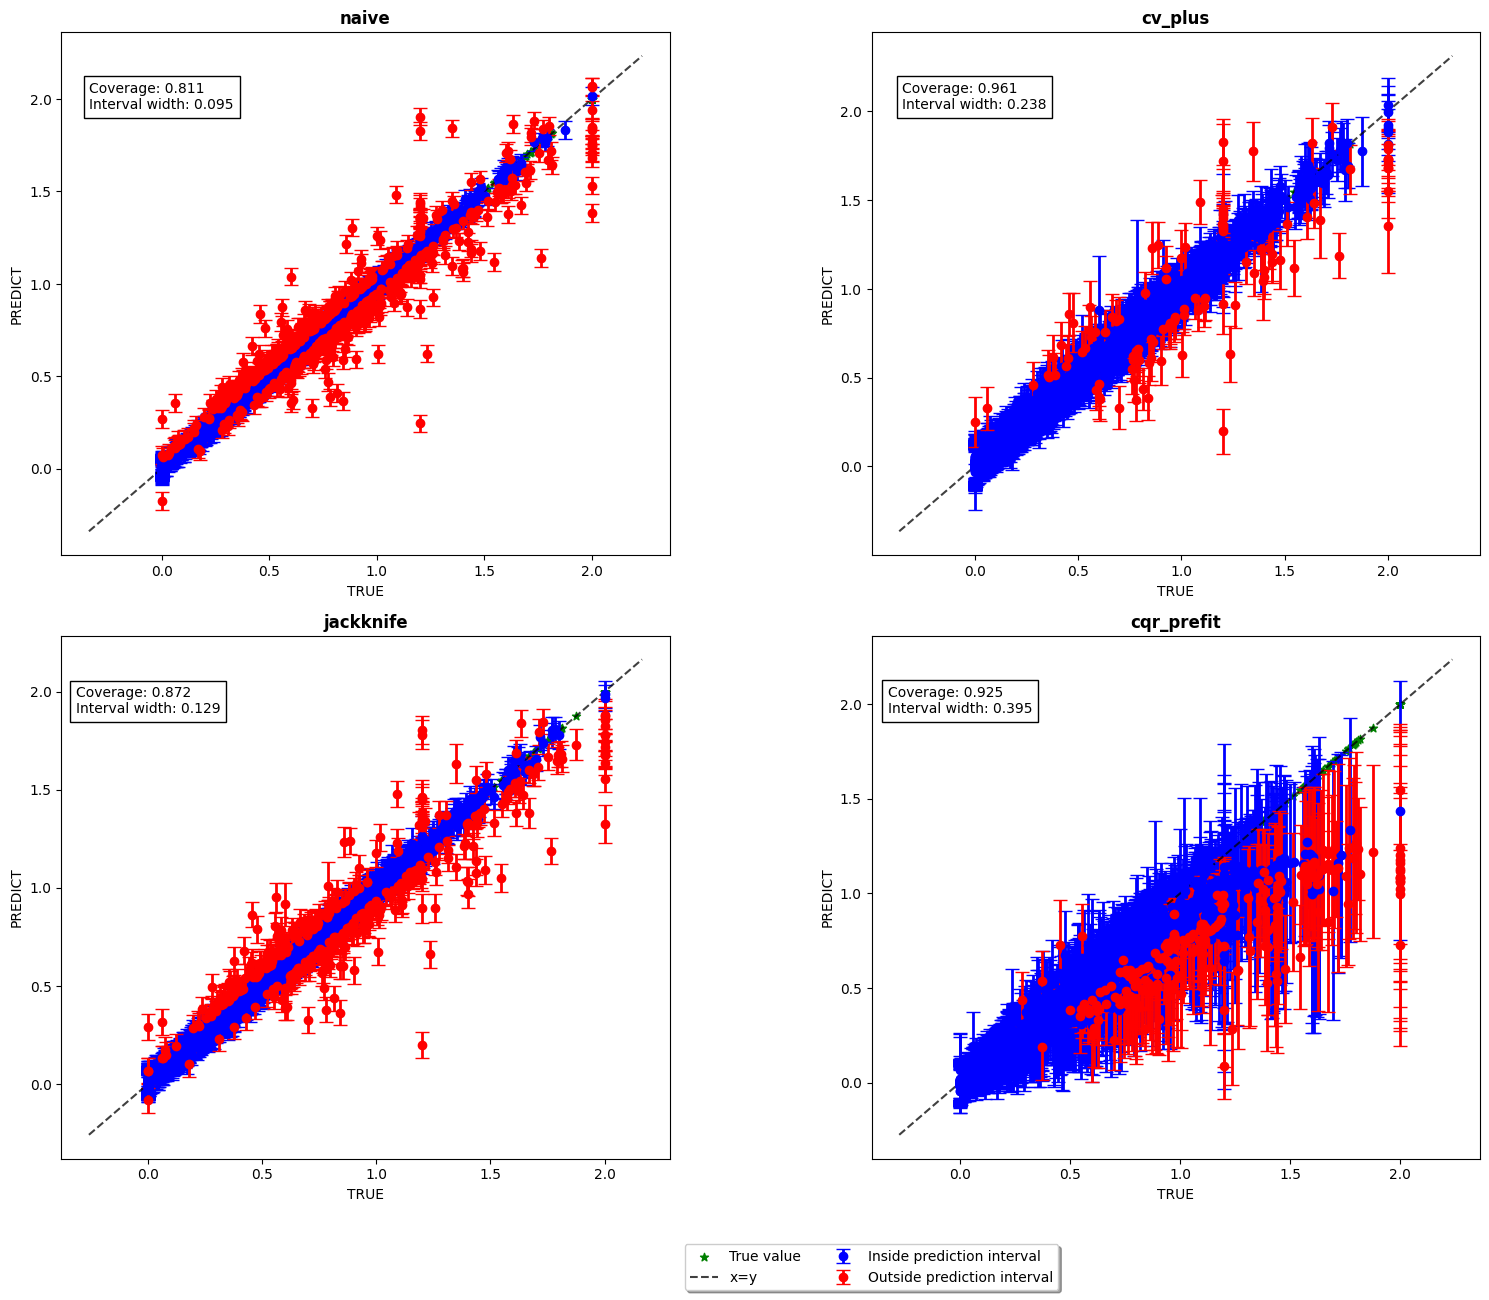

In [45]:
from matplotlib.offsetbox import AnnotationBbox, TextArea
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import randint, uniform
from sklearn.datasets import fetch_california_housing
round_to = 3

results = {
    "naive": df_naive,
    "cv_plus": df_cv_plus,
    "jackknife": df_jackknife,
    "cqr_prefit": df_cqr_prefit
}

perc_obs_plot = 1  # lấy 10% mẫu để plot
rng = np.random.default_rng(42)
num_plots = rng.choice(len(df_naive), int(perc_obs_plot * len(df_naive)), replace=False)

fig, axs = plt.subplots(2, 2, figsize=(15, 13))
coords = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]

for (strategy, df), ax in zip(results.items(), coords):
    y_test = df["y_true"].values
    y_pred = df[f"y_pred_{strategy}"].values
    y_lower = df[f"y_lower_{strategy}"].values
    y_upper = df[f"y_upper_{strategy}"].values

    coverage_val = regression_coverage_score(y_test, y_lower, y_upper)
    width_val = regression_mean_width_score(y_lower, y_upper)

    y_test_sorted, y_pred_sorted, lower_sorted, upper_sorted = sort_y_values(y_test, y_pred, y_lower, y_upper)

    plot_prediction_intervals(
        title=strategy,
        axs=ax,
        y_test_sorted=y_test_sorted,
        y_pred_sorted=y_pred_sorted,
        lower_bound=lower_sorted,
        upper_bound=upper_sorted,
        coverage=coverage_val,
        width=width_val,
        num_plots_idx=num_plots
    )
    
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(_, []) for _ in zip(*lines_labels)]
    plt.legend(
        lines[:4], labels[:4],
        loc='upper center',
        bbox_to_anchor=(0, -0.15),
        fancybox=True,
        shadow=True,
        ncol=2
    )

plt.tight_layout()
plt.show()
